In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Subir o arquivo
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# Carregar os dados
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Filmes
filmes = df[df['type'] == 'Movie'].copy()

# Séries
series = df[df['type'] == 'TV Show'].copy()

# Gêneros (normalizado)
generos = df[['show_id', 'listed_in']].copy()
generos['listed_in'] = generos['listed_in'].str.split(", ")
generos = generos.explode('listed_in').rename(columns={'listed_in': 'genre'})

In [ ]:
# Salvar cada tabela em CSV
filmes.to_csv("filmes.csv", index=False)
series.to_csv("series.csv", index=False)
generos.to_csv("generos.csv", index=False)

In [ ]:
# Baixar os arquivos
files.download("filmes.csv")
files.download("series.csv")
files.download("generos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Abrir Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salvar no Drive
filmes.to_csv("/content/drive/MyDrive/netflix/filmes.csv", index=False)
series.to_csv("/content/drive/MyDrive/netflix/series.csv", index=False)
generos.to_csv("/content/drive/MyDrive/netflix/generos.csv", index=False)

In [4]:
# Leitura das tabelas
filmes = pd.read_csv("/content/drive/MyDrive/netflix/filmes.csv")
generos = pd.read_csv("/content/drive/MyDrive/netflix/generos.csv")
series = pd.read_csv("/content/drive/MyDrive/netflix/series.csv")

In [11]:
# Filtrar apenas filmes
filmes_only = filmes[filmes['type'] == 'Movie'].copy()

# Remover o texto " min" e converter para número
filmes_only['duration_int'] = filmes_only['duration'].str.replace(" min", "", regex=False)
filmes_only['duration_int'] = pd.to_numeric(filmes_only['duration_int'], errors='coerce')

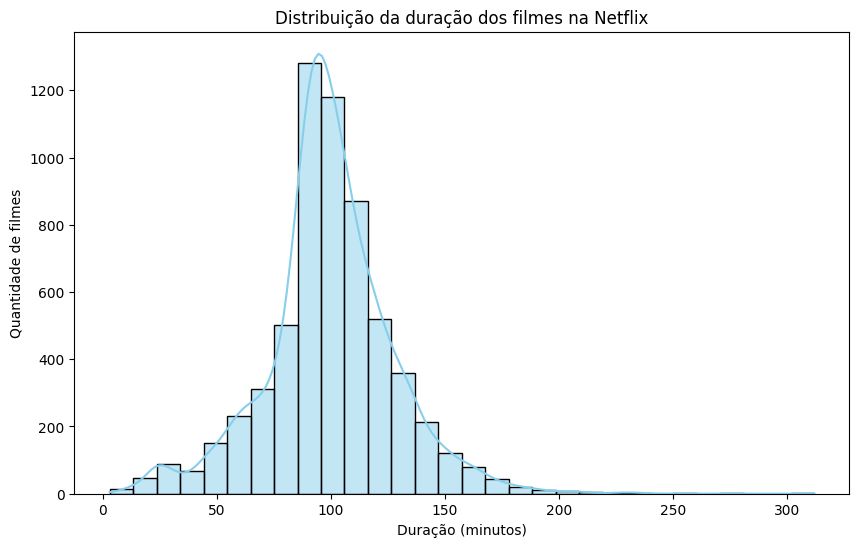

Média: 99.57718668407311
Mediana: 98.0
Mínimo: 3.0
Máximo: 312.0


In [46]:
# Distribuição da duração
plt.figure(figsize=(10,6))
sns.histplot(filmes_only['duration_int'], bins=30, kde=True, color="skyblue")

plt.title("Distribuição da duração dos filmes na Netflix")
plt.xlabel("Duração (minutos)")
plt.ylabel("Quantidade de filmes")
plt.show()

# --- Análise Exploratória ---
# Dados dos filmes por minuto
print("Média:", filmes_only['duration_int'].mean())
print("Mediana:", filmes_only['duration_int'].median())
print("Mínimo:", filmes_only['duration_int'].min())
print("Máximo:", filmes_only['duration_int'].max())

**Análise exploratória:**
- A maioria dos filmes tem duração entre 90 e 120 minutos.
- Títulos acima de 180 minutos são raros.
- Isso indica que o catálogo foca em longas-metragens tradicionais.

In [21]:
# Criar uma nova coluna com a lista de gêneros
filmes['generos_lista'] = filmes['listed_in'].str.split(', ')

# "Explodir" a lista em várias linhas, uma por gênero
filmes_exploded = filmes.explode('generos_lista')

# Conferir o resultado
filmes_exploded[['title', 'generos_lista']].head()

,title,generos_lista
0,Dick Johnson Is Dead,Documentaries
1,My Little Pony: A New Generation,Children & Family Movies
2,Sankofa,Dramas
2,Sankofa,Independent Movies
2,Sankofa,International Movies


In [22]:
# Quantidade de filmes por gênero
filmes_exploded['generos_lista'].value_counts()

,count
generos_lista,
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


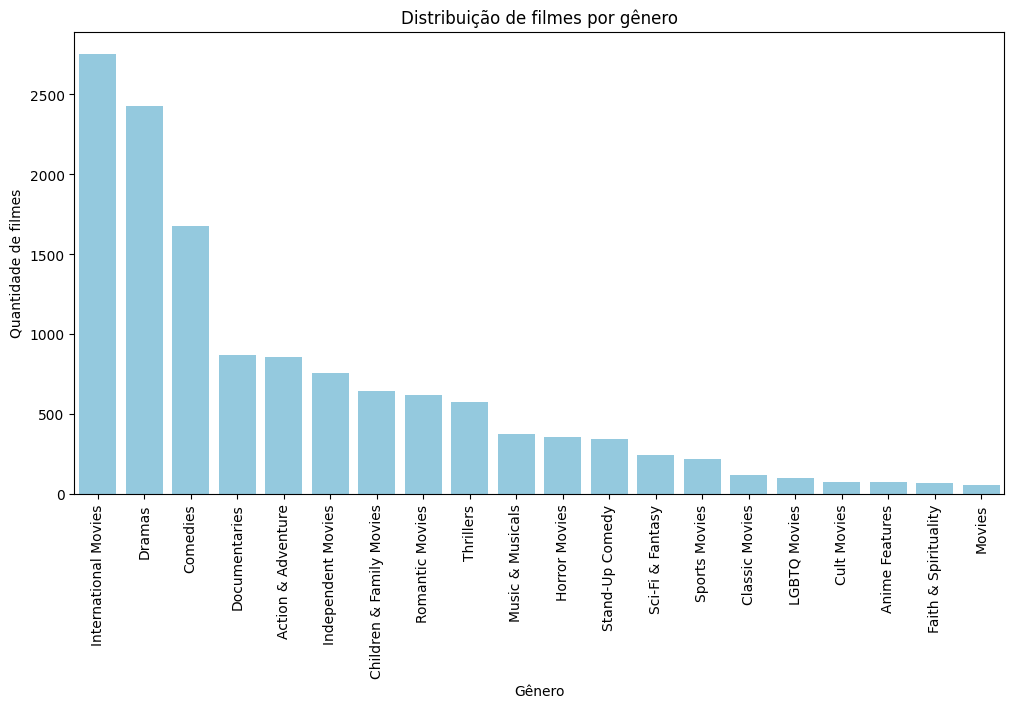

In [35]:
# Contar filmes por gênero
contagem_generos = filmes_exploded['generos_lista'].value_counts()

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=contagem_generos.index, y=contagem_generos.values, color="skyblue")
plt.xticks(rotation=90)  # rotaciona os nomes dos gêneros para ficar legível
plt.title("Distribuição de filmes por gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de filmes")
plt.show()

### Distribuição de Filmes por Gênero

A análise dos gêneros mostra a predominância de categorias como **International Movies**, **Drama** e **Comédia**, que se destacam com maior número de filmes no catálogo. Isso evidencia uma estratégia da Netflix em priorizar gêneros amplamente consumidos e de apelo global, garantindo maior alcance de público. Ao mesmo tempo, também há a presença de gêneros mais específicos, ainda que em menor quantidade, refletindo a diversidade de conteúdos que a plataforma busca oferecer.


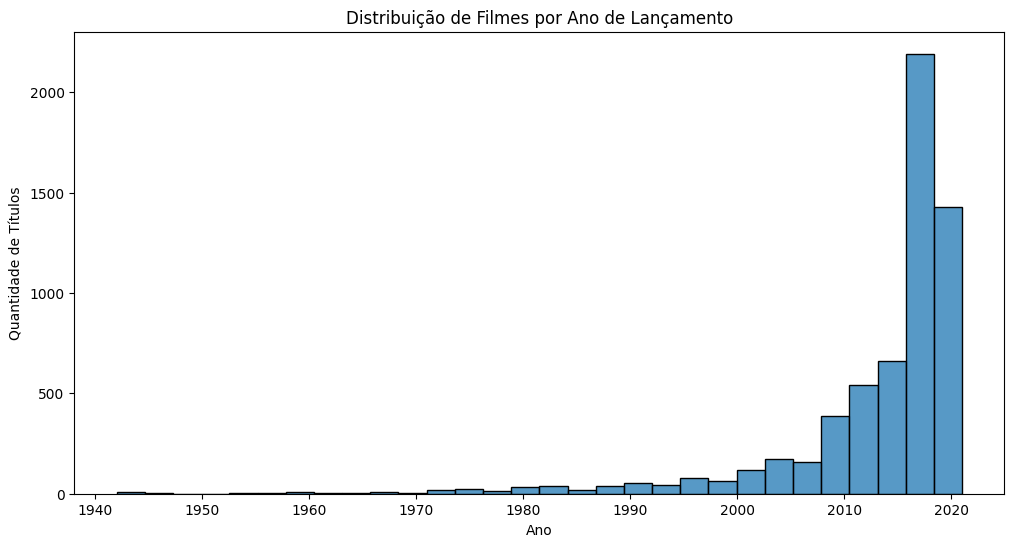

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(filmes['release_year'], bins=30, kde=False)
plt.title('Distribuição de Filmes por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Títulos')
plt.show()

### Distribuição de Filmes e Séries por Ano de Lançamento

A distribuição ao longo dos anos mostra que há uma concentração maior de títulos a partir dos anos 2000, indicando o crescimento da indústria audiovisual e também a incorporação de produções mais recentes ao catálogo da Netflix. Esse padrão revela a estratégia da plataforma em disponibilizar conteúdos atuais para atrair o público.

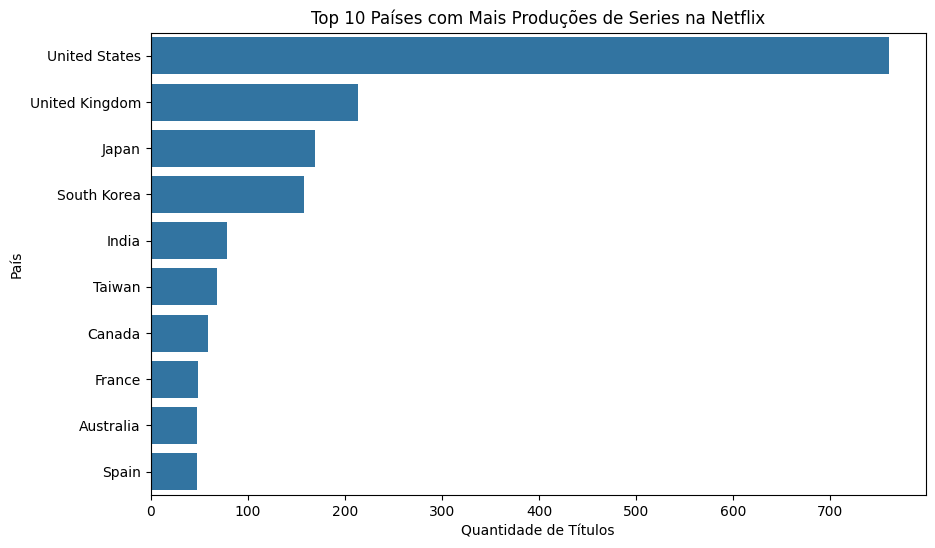

In [51]:
top_countries = series['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Países com Mais Produções de Series na Netflix')
plt.xlabel('Quantidade de Títulos')
plt.ylabel('País')
plt.show()

### Top 10 Países com Mais Produções

Os países com maior presença no catálogo da Netflix são liderados pelos Estados Unidos, seguidos por Reino Unido e Japão. Esse resultado reflete a predominância das grandes indústrias do audiovisual, mas também destaca o esforço da plataforma em trazer diversidade internacional para seus assinantes.


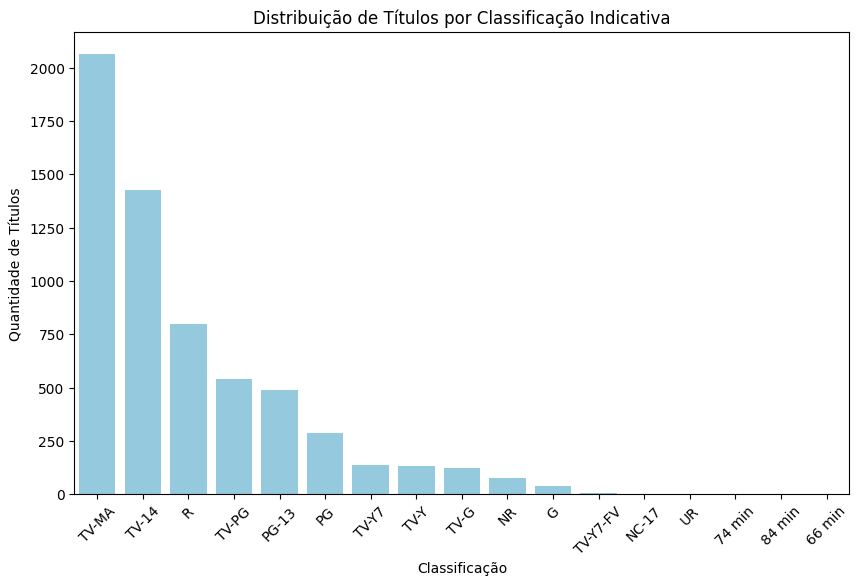

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=filmes, order=filmes['rating'].value_counts().index, color="skyblue")
plt.title('Distribuição de Títulos por Classificação Indicativa')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Títulos')
plt.xticks(rotation=45)
plt.show()

### Distribuição de Títulos por Classificação Indicativa

A análise das classificações indicativas evidencia que a maior parte dos títulos é voltada para o público adulto (como TV-MA). Isso sugere que a Netflix foca em conteúdos maduros, ainda que mantenha uma diversidade de opções para diferentes faixas etárias, atendendo públicos variados.

# Conclusão
A análise mostrou que a Netflix expandiu fortemente sua produção a partir de 2000, com foco em gêneros como Drama e Comédia e concentração em determinados países. A duração dos filmes tende a se concentrar em torno de 98 minutos e não apresenta relação clara com a avaliação média. Esses achados ajudam a entender melhor o catálogo e a estratégia de conteúdo da empresa.

In [59]:
# Filmes
filmes['country'] = filmes['country'].fillna("Unknown")
filmes['rating'] = filmes['rating'].fillna("Not Rated")
filmes['date_added'] = pd.to_datetime(filmes['date_added'].fillna(filmes['date_added'].mode()[0]), errors='coerce')
filmes['duration_int'] = filmes['duration'].str.replace(" min","",regex=False).astype(float)
filmes['is_long_movie'] = filmes['duration_int'] >= 120
filmes['num_genres'] = filmes['listed_in'].str.split(',').apply(len)

# Séries
series['country'] = series['country'].fillna("Unknown")
series['rating'] = series['rating'].fillna("Not Rated")
series['date_added'] = pd.to_datetime(series['date_added'].fillna(series['date_added'].mode()[0]), errors='coerce')
series['duration_int'] = series['duration'].str.replace(" Season","",regex=False).str.replace("s","",regex=False).astype(float)
series['num_genres'] = series['listed_in'].str.split(',').apply(len)

# Gêneros
generos['genre'] = generos['genre'].str.strip().str.title()